<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/AIML_Practice_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2022-12-09 12:46:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K   191KB/s    in 0.2s    

2022-12-09 12:46:55 (191 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('auto-mpg.data',delimiter='\s+',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','modelyear','origin','carname'])

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.origin.unique()

array([1, 3, 2])

In [ ]:
!pip install -U pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df,title='First insights of data')

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file('AutoMpg.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [ ]:
df['horsepower'] = df['horsepower'].astype('float')

ValueError: ignored

In [ ]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [ ]:
df = df[df['horsepower'] != '?']

In [ ]:
df['horsepower'] = df['horsepower'].astype('float')

<ipython-input-25-b627a89f71ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype('float')


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'carname'],
      dtype='object')

In [ ]:
x = df[['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'modelyear']]
y = df['mpg']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients ',lr.coef_)
print('intercept is ',lr.intercept_)

Coefficients  [-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]
intercept is  -15.057758585282361


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
dfpred = pd.DataFrame({'Actual Values':y_test,'Predicted values':y_pred})
dfpred

,Actual Values,Predicted values
79,26.0,25.932796
276,21.6,26.299279
248,36.1,32.965489
56,26.0,26.854430
393,27.0,29.453726
...,...,...
366,17.6,24.182221
83,28.0,25.888602
115,15.0,13.584499
3,16.0,15.440946


In [ ]:
lr.score(x_test,y_test)

0.7942349075428586

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
print('Error is ',np.sqrt(mean_squared_error(y_pred,y_test)))

Error is  3.240736078334261


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

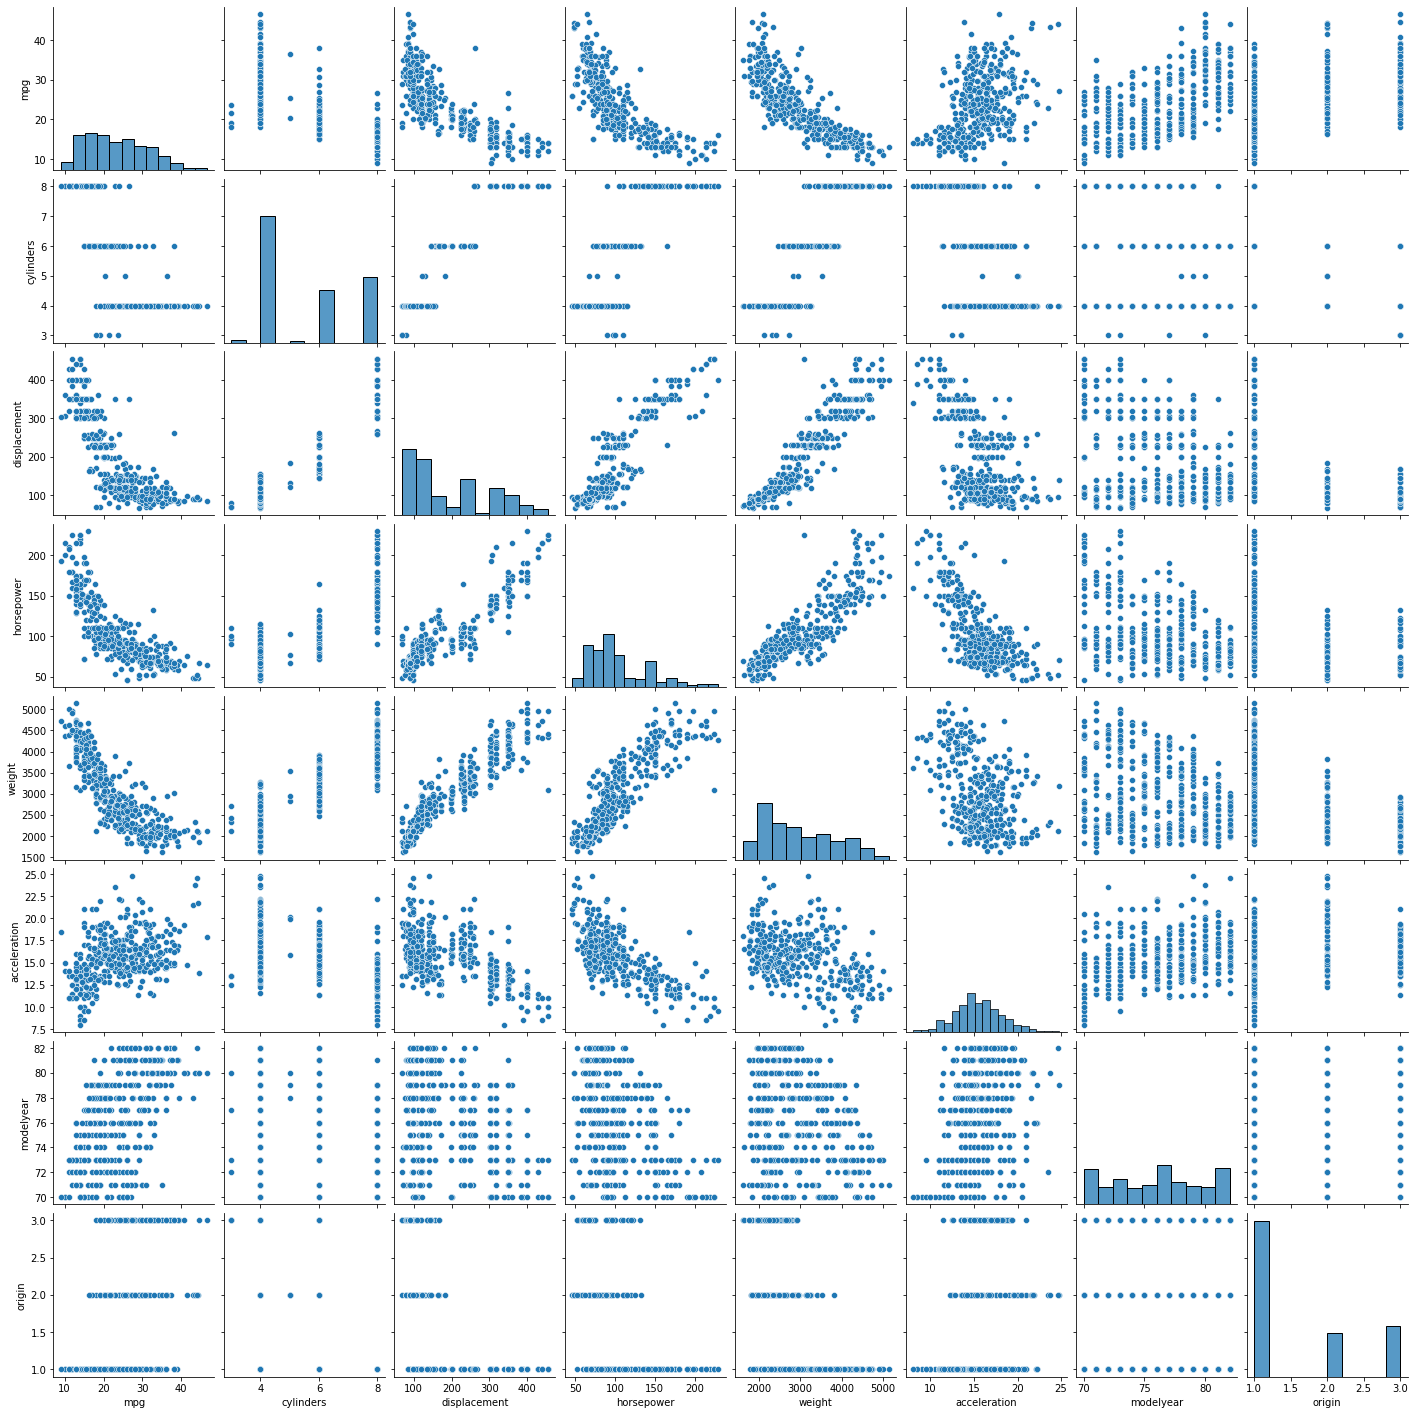

In [ ]:
sns.pairplot(df)

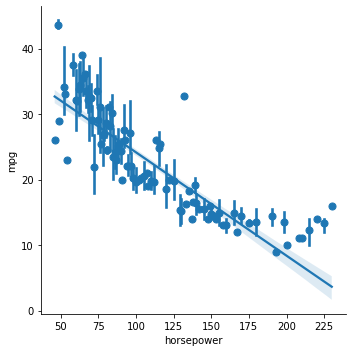

In [ ]:
sns.lmplot(x = 'horsepower',y = 'mpg',data =df,x_estimator=np.mean)